<a href="https://colab.research.google.com/github/trq11137/public_ml_webapp/blob/main/Project_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os
import xgboost
from sklearn.ensemble import AdaBoostClassifier

%matplotlib inline





In [68]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset import


In [69]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset-of-Diabetes.csv") 

In [70]:


df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [71]:
df['CLASS'].value_counts()


Y     840
N     102
P      53
Y       4
N       1
Name: CLASS, dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [73]:
df['CLASS'] = df['CLASS'].str.replace("N ","N")

In [74]:
df['CLASS'] = df['CLASS'].str.replace("Y ","Y")

In [75]:
df['Gender'] = df['Gender'].str.replace("f","F")

In [76]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [77]:
df['CLASS'].unique()

array(['N', 'P', 'Y'], dtype=object)

In [78]:
df.CLASS= le.fit_transform(df.CLASS.values)
df.Gender= le.fit_transform(df.Gender.values)

In [79]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [80]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   int64  
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 109.5 KB


In [81]:
df.describe()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,0.565000,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020,1.741000
std,240.397673,3.380758e+06,0.496005,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388,0.631124
min,1.000000,1.230000e+02,0.000000,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000,0.000000
25%,125.750000,2.406375e+04,0.000000,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000,2.000000
50%,300.500000,3.439550e+04,1.000000,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000,2.000000
75%,550.250000,4.538425e+04,1.000000,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000,2.000000
max,800.000000,7.543566e+07,1.000000,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000,2.000000


Visualizing aspects of the **dataset**

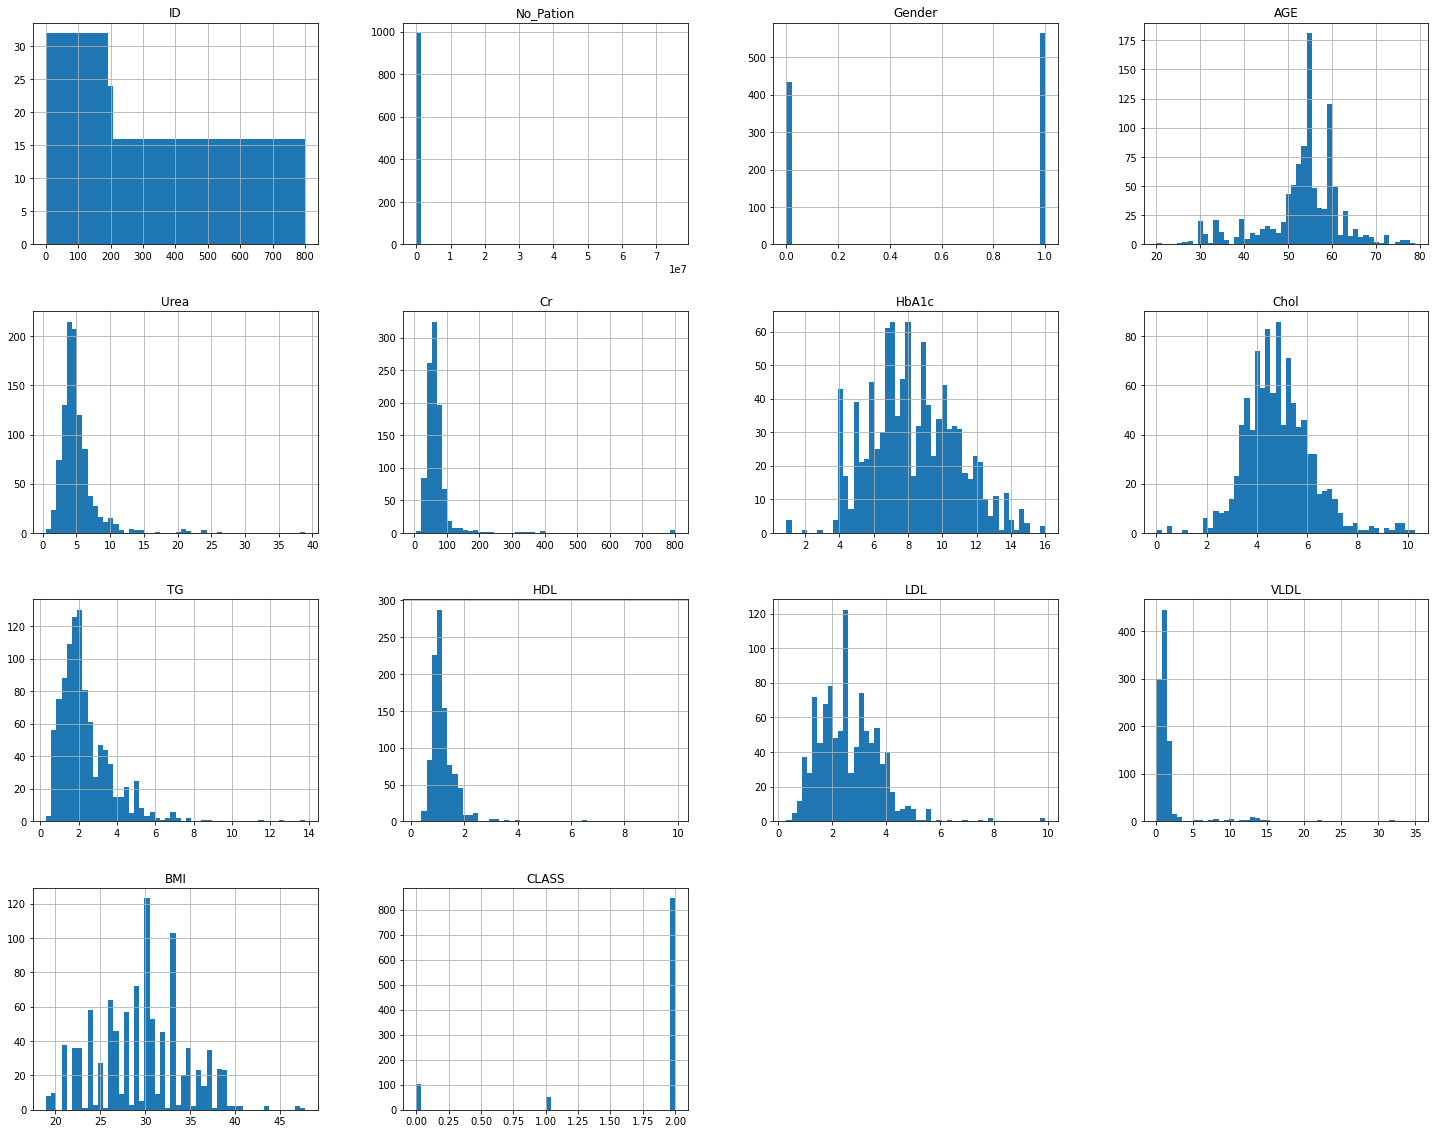

In [82]:
df.hist(bins=50, figsize=(25, 20))
plt.show()

# **Removing duplicated data points**

In [83]:
df.drop_duplicates(keep='first', inplace=True)

**Creating a test set**

In [84]:
original_train_df, test_df = train_test_split(df, test_size=0.2)

# To be sure we will create a copy for further processing
train_df = original_train_df.copy() 

# **Gaining further insight**

In [85]:
correlation_matrix = train_df.corr(method='pearson')

correlation_matrix 

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
ID,1.000000,0.077491,0.053669,-0.085699,-0.086286,-0.084357,0.002218,0.011502,-0.060264,0.009735,-0.080307,0.184194,0.084033,-0.043148
No_Pation,0.077491,1.000000,0.056509,-0.097508,-0.021168,0.003544,-0.037009,-0.034876,-0.047581,-0.014207,-0.004182,0.121875,0.017034,-0.054167
Gender,0.053669,0.056509,1.000000,0.008575,0.118467,0.165692,-0.026146,-0.066231,0.050237,-0.140497,0.054869,0.195761,0.059700,0.079361
AGE,-0.085699,-0.097508,0.008575,1.000000,0.104141,0.054987,0.371751,0.038436,0.146044,-0.019545,0.011675,-0.076661,0.376456,0.443052
Urea,-0.086286,-0.021168,0.118467,0.104141,1.000000,0.597701,-0.033747,0.016365,0.042350,-0.036910,-0.010840,-0.009629,0.029093,0.058469
Cr,-0.084357,0.003544,0.165692,0.054987,0.597701,1.000000,-0.056937,-0.025352,0.059856,-0.037579,0.025951,0.016426,0.028213,0.026280
HbA1c,0.002218,-0.037009,-0.026146,0.371751,-0.033747,-0.056937,1.000000,0.208716,0.224755,0.048255,0.017228,0.076760,0.420338,0.555399
Chol,0.011502,-0.034876,-0.066231,0.038436,0.016365,-0.025352,0.208716,1.000000,0.341433,0.112546,0.433268,0.083882,0.031037,0.181128
TG,-0.060264,-0.047581,0.050237,0.146044,0.042350,0.059856,0.224755,0.341433,1.000000,-0.087113,0.043708,0.148507,0.091164,0.172007
HDL,0.009735,-0.014207,-0.140497,-0.019545,-0.036910,-0.037579,0.048255,0.112546,-0.087113,1.000000,-0.133423,-0.059615,0.072665,0.005698


In [86]:
correlation_matrix["CLASS"].sort_values()


No_Pation   -0.054167
ID          -0.043148
LDL          0.001643
HDL          0.005698
Cr           0.026280
Urea         0.058469
Gender       0.079361
VLDL         0.094728
TG           0.172007
Chol         0.181128
AGE          0.443052
HbA1c        0.555399
BMI          0.572733
CLASS        1.000000
Name: CLASS, dtype: float64

Handling missing data

In [87]:
names = ['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

for name in names:
    train_df[name].replace(0, np.nan, inplace=True)

In [88]:
train_df.head()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
907,73,786745,NaN,56,3.0,48,7.2,6.5,3.4,0.9,2.6,1.2,33.0,2
458,769,34384,NaN,54,8.6,75,8.9,4.6,2.6,0.9,1.3,1.0,36.0,2
174,7,34278,NaN,46,3.0,59,5.1,5.7,3.8,1.3,2.8,1.7,24.0,2
792,529,1495,1.0,55,4.9,33,10.2,3.9,0.6,1.3,2.3,0.3,27.0,2
344,297,34346,1.0,54,4.2,48,6.5,2.4,1.0,1.0,0.9,0.7,33.0,2


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   int64  
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 117.2 KB


In [90]:
id_median = train_df["ID"].median()
no_pation_median = train_df["No_Pation"].median()
gender_median = train_df["Gender"].median()
age_median = train_df["AGE"].median()
urea_median = train_df["Urea"].median()
cr_median = train_df["Cr"].median()
hba1c_median = train_df['HbA1c'].median()
chol_median = train_df['Chol'].median()
tg_median = train_df['TG'].median()
hdl_median = train_df['HDL'].median()
ldl_median = train_df['LDL'].median()
vldl_median = train_df['VLDL'].median()
bmi_median = train_df['BMI'].median()

train_df["ID"].fillna(id_median, inplace=True)
train_df["No_Pation"].fillna(no_pation_median, inplace=True)
train_df["Gender"].fillna(gender_median, inplace=True)
train_df["AGE"].fillna(age_median, inplace=True)
train_df["Urea"].fillna(urea_median, inplace=True)
train_df["Cr"].fillna(cr_median, inplace=True)
train_df["HbA1c"].fillna(hba1c_median, inplace=True)
train_df["Chol"].fillna(chol_median, inplace=True)
train_df["TG"].fillna(tg_median, inplace=True)
train_df["HDL"].fillna(hdl_median, inplace=True)
train_df["LDL"].fillna(ldl_median, inplace=True)
train_df["VLDL"].fillna(vldl_median, inplace=True)
train_df["BMI"].fillna(bmi_median, inplace=True)

In [91]:
train_df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
907,73,786745,1.0,56,3.0,48,7.2,6.5,3.4,0.9,2.6,1.2,33.0,2
458,769,34384,1.0,54,8.6,75,8.9,4.6,2.6,0.9,1.3,1.0,36.0,2
174,7,34278,1.0,46,3.0,59,5.1,5.7,3.8,1.3,2.8,1.7,24.0,2
792,529,1495,1.0,55,4.9,33,10.2,3.9,0.6,1.3,2.3,0.3,27.0,2
344,297,34346,1.0,54,4.2,48,6.5,2.4,1.0,1.0,0.9,0.7,33.0,2


**Encoding categorial attributes**

In [92]:
# Copy original dataframe and add new column with random fitness values
temp_df = train_df.copy()
fitness_values = ["bad", "moderate", "good", "very good",]
temp_df['fitness'] = np.random.choice(fitness_values, temp_df.shape[0])

temp_df.head(5)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,fitness
907,73,786745,1.0,56,3.0,48,7.2,6.5,3.4,0.9,2.6,1.2,33.0,2,very good
458,769,34384,1.0,54,8.6,75,8.9,4.6,2.6,0.9,1.3,1.0,36.0,2,good
174,7,34278,1.0,46,3.0,59,5.1,5.7,3.8,1.3,2.8,1.7,24.0,2,moderate
792,529,1495,1.0,55,4.9,33,10.2,3.9,0.6,1.3,2.3,0.3,27.0,2,bad
344,297,34346,1.0,54,4.2,48,6.5,2.4,1.0,1.0,0.9,0.7,33.0,2,good


In [104]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
fitness_encoded = encoder.fit_transform(temp_df["fitness"])

for id_, class_ in enumerate(encoder.classes_):
    print(f"class id {id_} has label {class_}")

print()
print(f"Encoded fitness values for first 10 entries: {fitness_encoded[:10]}")

class id 0 has label bad
class id 1 has label good
class id 2 has label moderate
class id 3 has label very good

Encoded fitness values for first 10 entries: [3 1 2 0 1 0 2 0 0 3]


**Rescaling or standardizing attributes**

In [105]:
from sklearn.preprocessing import MinMaxScaler

# initialize min-max scaler
mm_scaler = MinMaxScaler()

temp1_df = train_df.copy()
column_names = temp1_df.columns.tolist()

# transform all attributes
temp1_df[column_names] = mm_scaler.fit_transform(temp1_df[column_names])

temp1_df.sort_index(inplace=True)
temp1_df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
1,0.922013,0.000451,0.0,0.101695,0.104167,0.070529,0.264901,0.319588,0.081481,0.092784,0.170213,0.014327,0.139130,0.0
2,0.525786,0.000633,0.0,0.508475,0.109375,0.050378,0.264901,0.371134,0.044444,0.226804,0.095745,0.011461,0.173913,0.0
3,0.852830,0.001159,0.0,0.508475,0.109375,0.050378,0.264901,0.371134,0.044444,0.226804,0.095745,0.011461,0.173913,0.0
4,0.631447,0.000451,0.0,0.220339,0.171875,0.050378,0.264901,0.443299,0.051852,0.061856,0.159574,0.008596,0.069565,0.0
5,0.794969,0.000451,0.0,0.423729,0.046875,0.022670,0.205298,0.237113,0.051852,0.082474,0.106383,0.008596,0.069565,0.0


In [106]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

temp2_df = train_df.copy()

# transform all attributes
temp2_df[column_names] = mm_scaler.fit_transform(temp2_df[column_names])
temp2_df.sort_index(inplace=True)
temp2_df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
1,0.922013,0.000451,0.0,0.101695,0.104167,0.070529,0.264901,0.319588,0.081481,0.092784,0.170213,0.014327,0.139130,0.0
2,0.525786,0.000633,0.0,0.508475,0.109375,0.050378,0.264901,0.371134,0.044444,0.226804,0.095745,0.011461,0.173913,0.0
3,0.852830,0.001159,0.0,0.508475,0.109375,0.050378,0.264901,0.371134,0.044444,0.226804,0.095745,0.011461,0.173913,0.0
4,0.631447,0.000451,0.0,0.220339,0.171875,0.050378,0.264901,0.443299,0.051852,0.061856,0.159574,0.008596,0.069565,0.0
5,0.794969,0.000451,0.0,0.423729,0.046875,0.022670,0.205298,0.237113,0.051852,0.082474,0.106383,0.008596,0.069565,0.0


In [107]:
df['CLASS'].value_counts()

2    844
0    103
1     53
Name: CLASS, dtype: int64

In [108]:
df.groupby('CLASS').mean()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
CLASS,,,,,,,,,,,,,
0,368.252427,815851.990291,0.378641,44.233010,4.680583,62.796117,4.560194,4.268932,1.625243,1.227184,2.625243,0.943689,22.374757
1,396.056604,64299.037736,0.679245,43.283019,4.511321,66.075472,6.003774,4.579245,2.126415,1.127358,2.493396,0.983019,23.933962
2,333.624408,216955.928910,0.580569,55.305687,5.217468,69.873223,8.878270,4.953104,2.452026,1.206872,2.615213,2.020616,30.811517


In [109]:
X = df.drop( 'CLASS', axis=1)


In [110]:
print(X)

      ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0    502      17975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1    735      34221       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2    420      47975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3    680      87656       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4    504      34223       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
..   ...        ...     ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
995  200     454317       1   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6   
996  671     876534       1   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4   
997  669      87654       1   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1   
998   99      24004       1   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0   
999  248      24054       1   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI  
0    24.0  
1    23.0  
2  

In [111]:
y = df['CLASS']

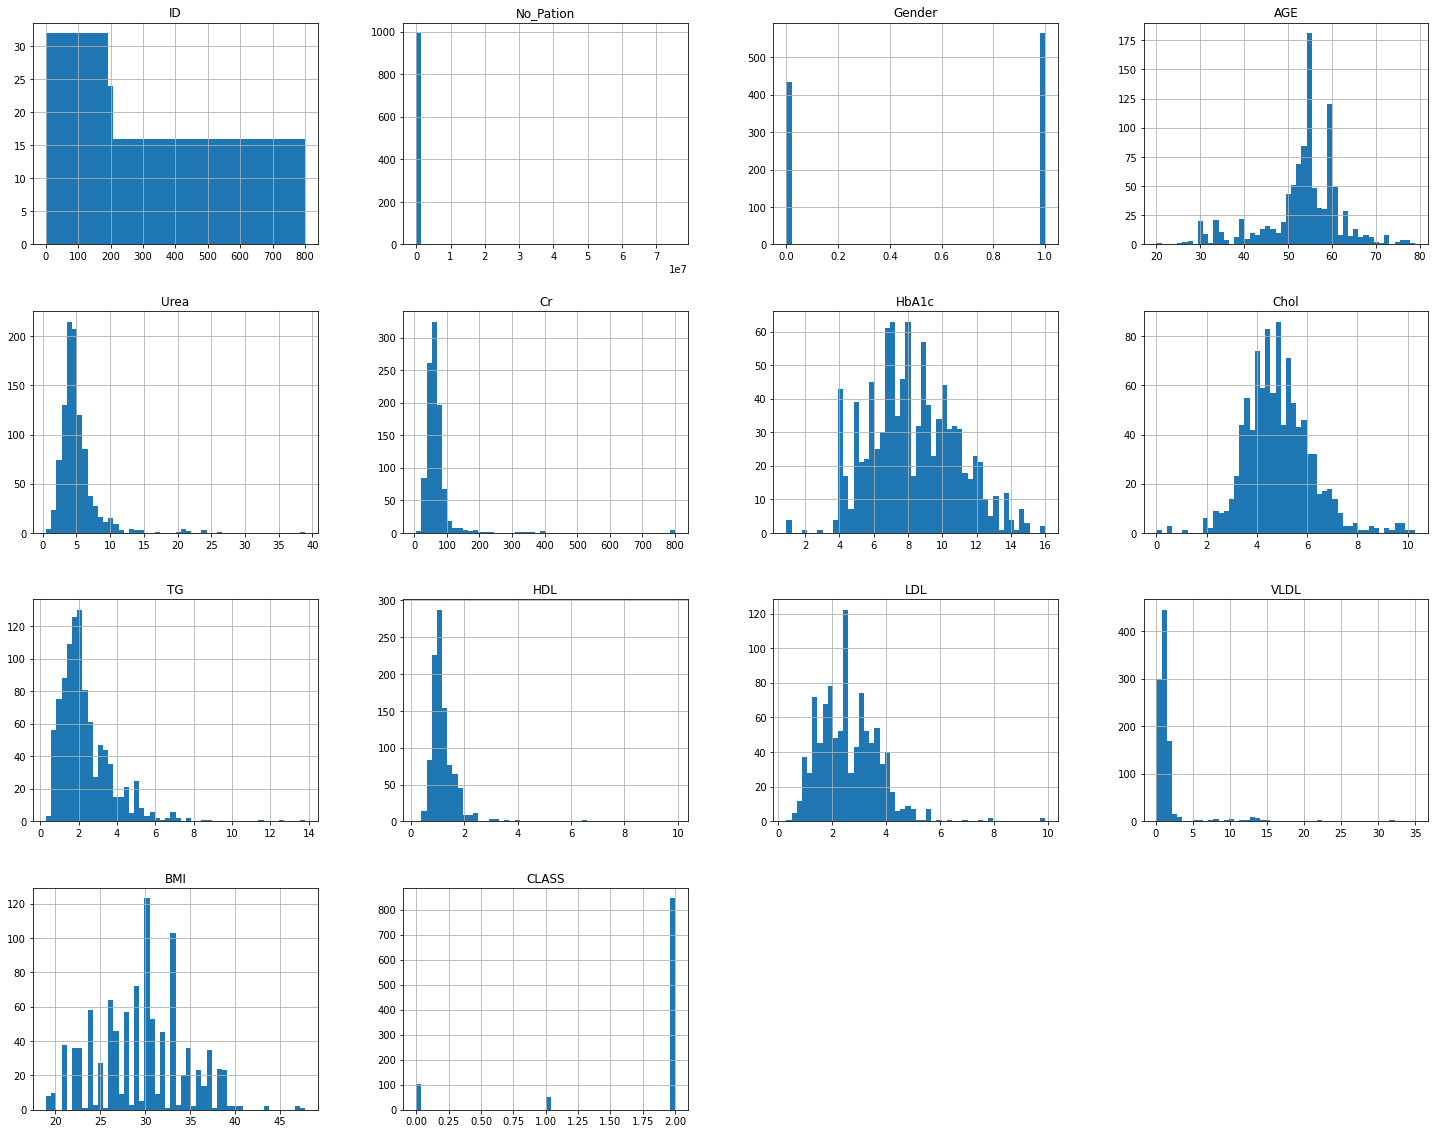

In [112]:
df.hist(bins=50, figsize=(25, 20))
plt.show()

In [113]:
from xgboost import XGBClassifier


In [114]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

In [116]:
model.fit(X_train, y_train)


XGBClassifier(eval_metric='mlogloss', objective='multi:softprob',
              use_label_encoder=False)

In [117]:
y_pred = model.predict(X_test)


In [118]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.99


In [119]:
recall = recall_score(y_test, y_pred,average='micro')
print(recall)

0.99


[[ 15   0   1]
 [  0   7   1]
 [  0   0 176]]


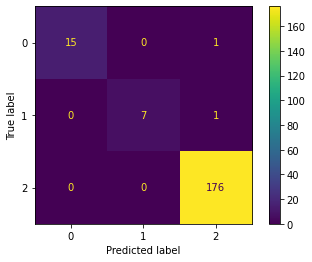

In [120]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred)
print(cm)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [122]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       1.00      0.88      0.93         8
           2       0.99      1.00      0.99       176

    accuracy                           0.99       200
   macro avg       1.00      0.94      0.97       200
weighted avg       0.99      0.99      0.99       200



ADAboost algorithm used

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

In [124]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

In [125]:
model = abc.fit(X_train, y_train)

In [126]:
model.score(X_train, y_train)

0.95875

In [127]:
model.score(X_test, y_test)

0.955

In [128]:
y_pred = model.predict(X_test)



In [129]:
print(accuracy_score(y_test, y_pred))

0.955


In [130]:
recall=metrics.recall_score(y_test, y_pred, average='micro')
pre=metrics.precision_score(y_test, y_pred, average='macro')
f1=metrics.f1_score(y_test, y_pred, average='weighted')


In [131]:
print('recall=',recall)
print('precision=',pre)
print('f1=',f1)


recall= 0.955
precision= 0.823529411764706
f1= 0.9625096209912536


In [132]:
metrics.recall_score(y_test, y_pred, labels=[1, 2], average='micro')


0.9510869565217391

In [133]:
metrics.precision_score(y_test, y_pred, labels=[1, 2], average='macro')


0.7352941176470589

In [134]:
metrics.f1_score(y_test, y_pred, labels=[1, 2], average='weighted')

0.9592495880339713

[[ 16   0   0]
 [  0   8   0]
 [  0   9 167]]


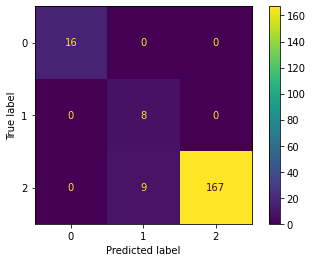

In [135]:
cm=confusion_matrix(y_test, y_pred)
print(cm)
cm_display = ConfusionMatrixDisplay(cm).plot()


In [136]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.47      1.00      0.64         8
           2       1.00      0.95      0.97       176

    accuracy                           0.95       200
   macro avg       0.82      0.98      0.87       200
weighted avg       0.98      0.95      0.96       200



ERROR  FIND OUT

In [137]:
from sklearn import metrics 


#import result of mse
print("mse=",metrics.mean_squared_error(y_test, y_pred))

#import result of mae
print("mae=",metrics.mean_absolute_error(y_test, y_pred))

#import result of rmse
print("rmse=",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mse= 0.045
mae= 0.045
rmse= 0.21213203435596426
